<a href="https://colab.research.google.com/github/dantrainor9/Breast_Cancer_Diagnostics/blob/main/Breast_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
path = '/content/drive/MyDrive/Breast cancer diagnostics/WBCdiag_02_withheader.csv'
df = pd.read_csv(path)

In [4]:
#beginning data exploration
df.head()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
0,-1,5,1,1,1,2,1,3,1,1
1,-1,5,4,4,5,7,10,3,2,1
2,-1,3,1,1,1,2,2,3,1,1
3,-1,6,8,8,1,3,4,3,7,1
4,-1,4,1,1,3,2,1,3,1,1


In [5]:
df.shape

(683, 10)

In [6]:
df.describe()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,-0.300146,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.954592,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,-1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MALIG               683 non-null    int64
 1   Clump_Thick         683 non-null    int64
 2   Uniform_Cell_Size   683 non-null    int64
 3   Uniform_Cell_Shape  683 non-null    int64
 4   Marginal_Adhes      683 non-null    int64
 5   Epit_Size           683 non-null    int64
 6   Bare_Nuclei         683 non-null    int64
 7   Bland_Chrom         683 non-null    int64
 8   Norm_Nucleoli       683 non-null    int64
 9   Mitoses             683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
df['MALIG'].value_counts()

MALIG
-1    444
 1    239
Name: count, dtype: int64

In [8]:
#reassigning all -1 values which indicate benign growths as 0
df['MALIG'] = np.where(df['MALIG']<0,0,df['MALIG'])

In [9]:
#while this dataset is small, the target column has good representation of the positive class.

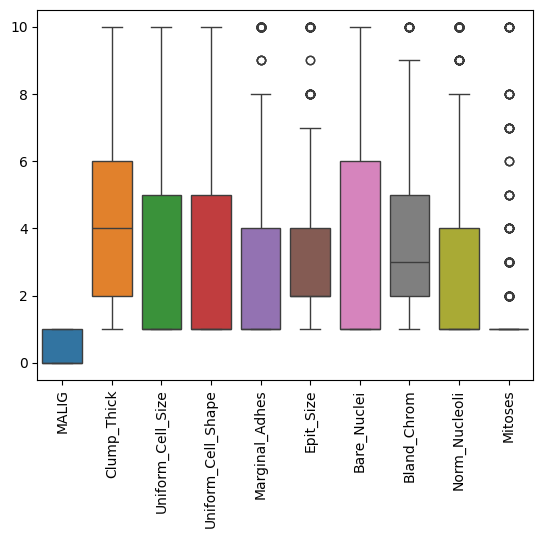

In [10]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [11]:
#some outliers, but these may still be indicators of malignancy
#also not a lot of variance in some of the feature columns, 6/9 have their mininmum, 25%, and 50% at 1

In [16]:
df.duplicated().value_counts()

False    449
True     234
Name: count, dtype: int64

In [ ]:
#lots of individuals with the same data. Interesting how close this is to the target column class split

In [22]:
corr=df.corr()

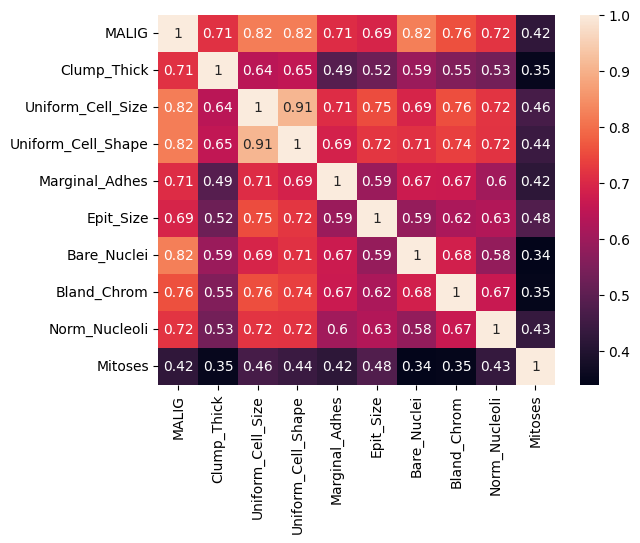

In [23]:
sns.heatmap(data=corr,annot=True);

In [25]:
#scaling data for clustering algorithm
scaler = StandardScaler()

In [26]:
df_scaled = scaler.fit_transform(df)

In [35]:
#clustering
kmeans = KMeans(n_clusters=3, max_iter=500)

In [36]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [37]:
#visualizing clusters
df['cluster'] = kmeans.labels_

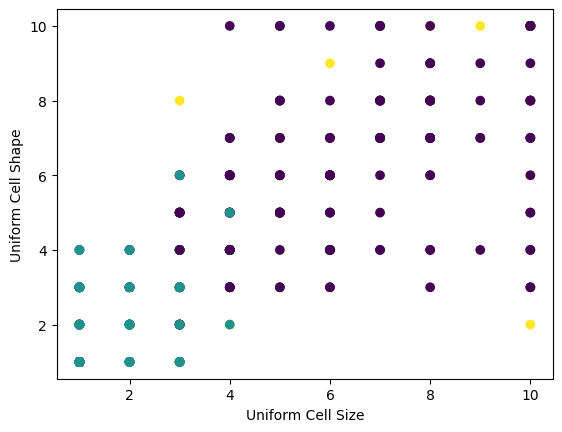

In [38]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

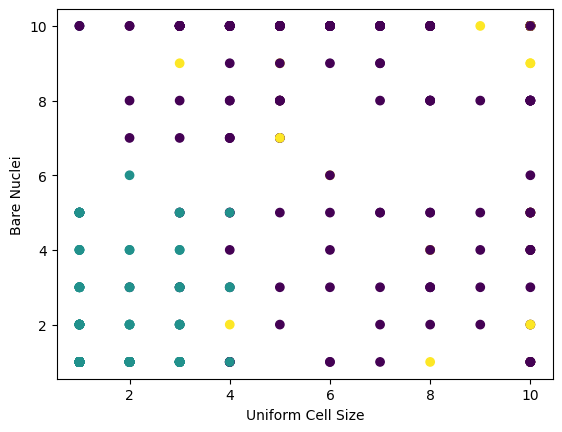

In [39]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

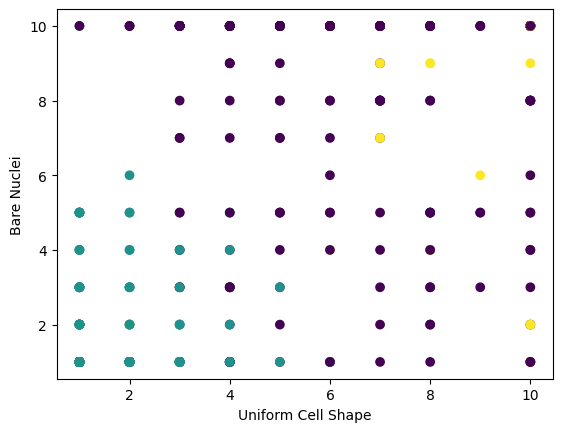

In [40]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [18]:
#separating out target column
X = df[['Clump_Thick',
      'Uniform_Cell_Size',
      'Uniform_Cell_Shape',
      'Marginal_Adhes',
      'Epit_Size',
      'Bare_Nuclei',
      'Bland_Chrom',
      'Norm_Nucleoli',
      'Mitoses']]
y = df['MALIG']

In [19]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
X_train.shape

(512, 9)